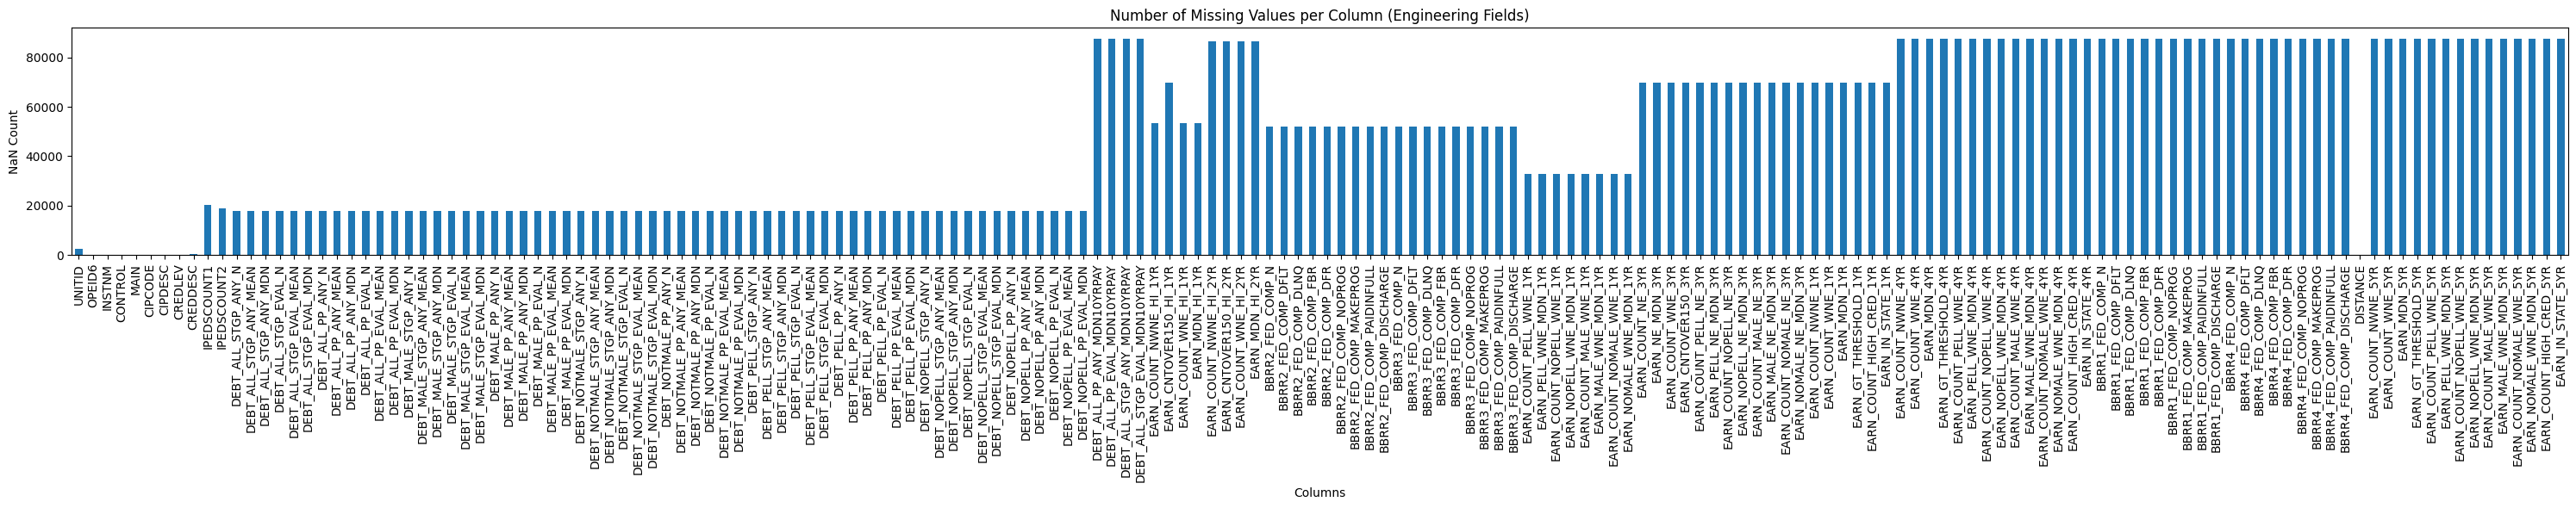

UNITID                        2401
OPEID6                           0
INSTNM                           0
CONTROL                          0
MAIN                             0
                             ...  
EARN_MALE_WNE_MDN_5YR        87432
EARN_COUNT_NOMALE_WNE_5YR    87432
EARN_NOMALE_WNE_MDN_5YR      87432
EARN_COUNT_HIGH_CRED_5YR     87432
EARN_IN_STATE_5YR            87432
Length: 174, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1. Load the CSV files
# -------------------------
# Replace these filenames with your actual file paths
files = [
    "FieldOfStudyData1415_1516_PP.csv",
    "FieldOfStudyData1516_1617_PP.csv",
    "FieldOfStudyData1617_1718_PP.csv",
    "FieldOfStudyData1718_1819_PP.csv",
    "FieldOfStudyData1819_1920_PP.csv",
    "FieldOfStudyData1920_2021_PP.csv",
    "Most-Recent-Cohorts-Field-of-Study.csv"
]

dfs = [pd.read_csv(f) for f in files]

# -------------------------
# 2. Merge them into one dataframe
# -------------------------
merged = pd.concat(dfs, ignore_index=True)

# -------------------------
# 3. Filter engineering only (CIP 14 and 15)
# -------------------------
# Assumes the CIP code column is named "CIPCODE" or similar — adjust if needed.
# CIP codes for engineering typically start with "14" or "15".
engineering = merged[merged["CIPCODE"].astype(str).str.startswith(("14", "15"))]

# -------------------------
# 4. Count NaNs in each column + plot
# -------------------------
nan_counts = engineering.isna().sum()

plt.figure(figsize=(30, 6))
nan_counts.plot(kind="bar")
plt.title("Number of Missing Values per Column (Engineering Fields)")
plt.xlabel("Columns")
plt.ylabel("NaN Count")
plt.tight_layout()
plt.show()

# Optional: print summary
print(nan_counts)


In [2]:
engineering.shape


(121798, 174)

In [3]:
engineering.describe

<bound method NDFrame.describe of            UNITID  OPEID6                        INSTNM              CONTROL  \
26       100654.0    1002      Alabama A & M University               Public   
27       100654.0    1002      Alabama A & M University               Public   
28       100654.0    1002      Alabama A & M University               Public   
29       100654.0    1002      Alabama A & M University               Public   
30       100654.0    1002      Alabama A & M University               Public   
...           ...     ...                           ...                  ...   
1619778       NaN   41839             CETYS Universidad              Foreign   
1619842       NaN   42106  Advanced Computing Institute  Private, for-profit   
1619843       NaN   42106  Advanced Computing Institute  Private, for-profit   
1619929       NaN   42571       Universiteit Maastricht              Foreign   
1619950       NaN   43006  Southeast New Mexico College               Public   

     

/scratch/local/18426562/ipykernel_2842033/2081961505.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ps_counts = (engineering.applymap(


                             NaN  ps
UNITID                      2401   0
OPEID6                         0   0
INSTNM                         0   0
CONTROL                        0   0
MAIN                           0   0
...                          ...  ..
EARN_MALE_WNE_MDN_5YR      87432   0
EARN_COUNT_NOMALE_WNE_5YR  87432   0
EARN_NOMALE_WNE_MDN_5YR    87432   0
EARN_COUNT_HIGH_CRED_5YR   87432   0
EARN_IN_STATE_5YR          87432   0

[174 rows x 2 columns]


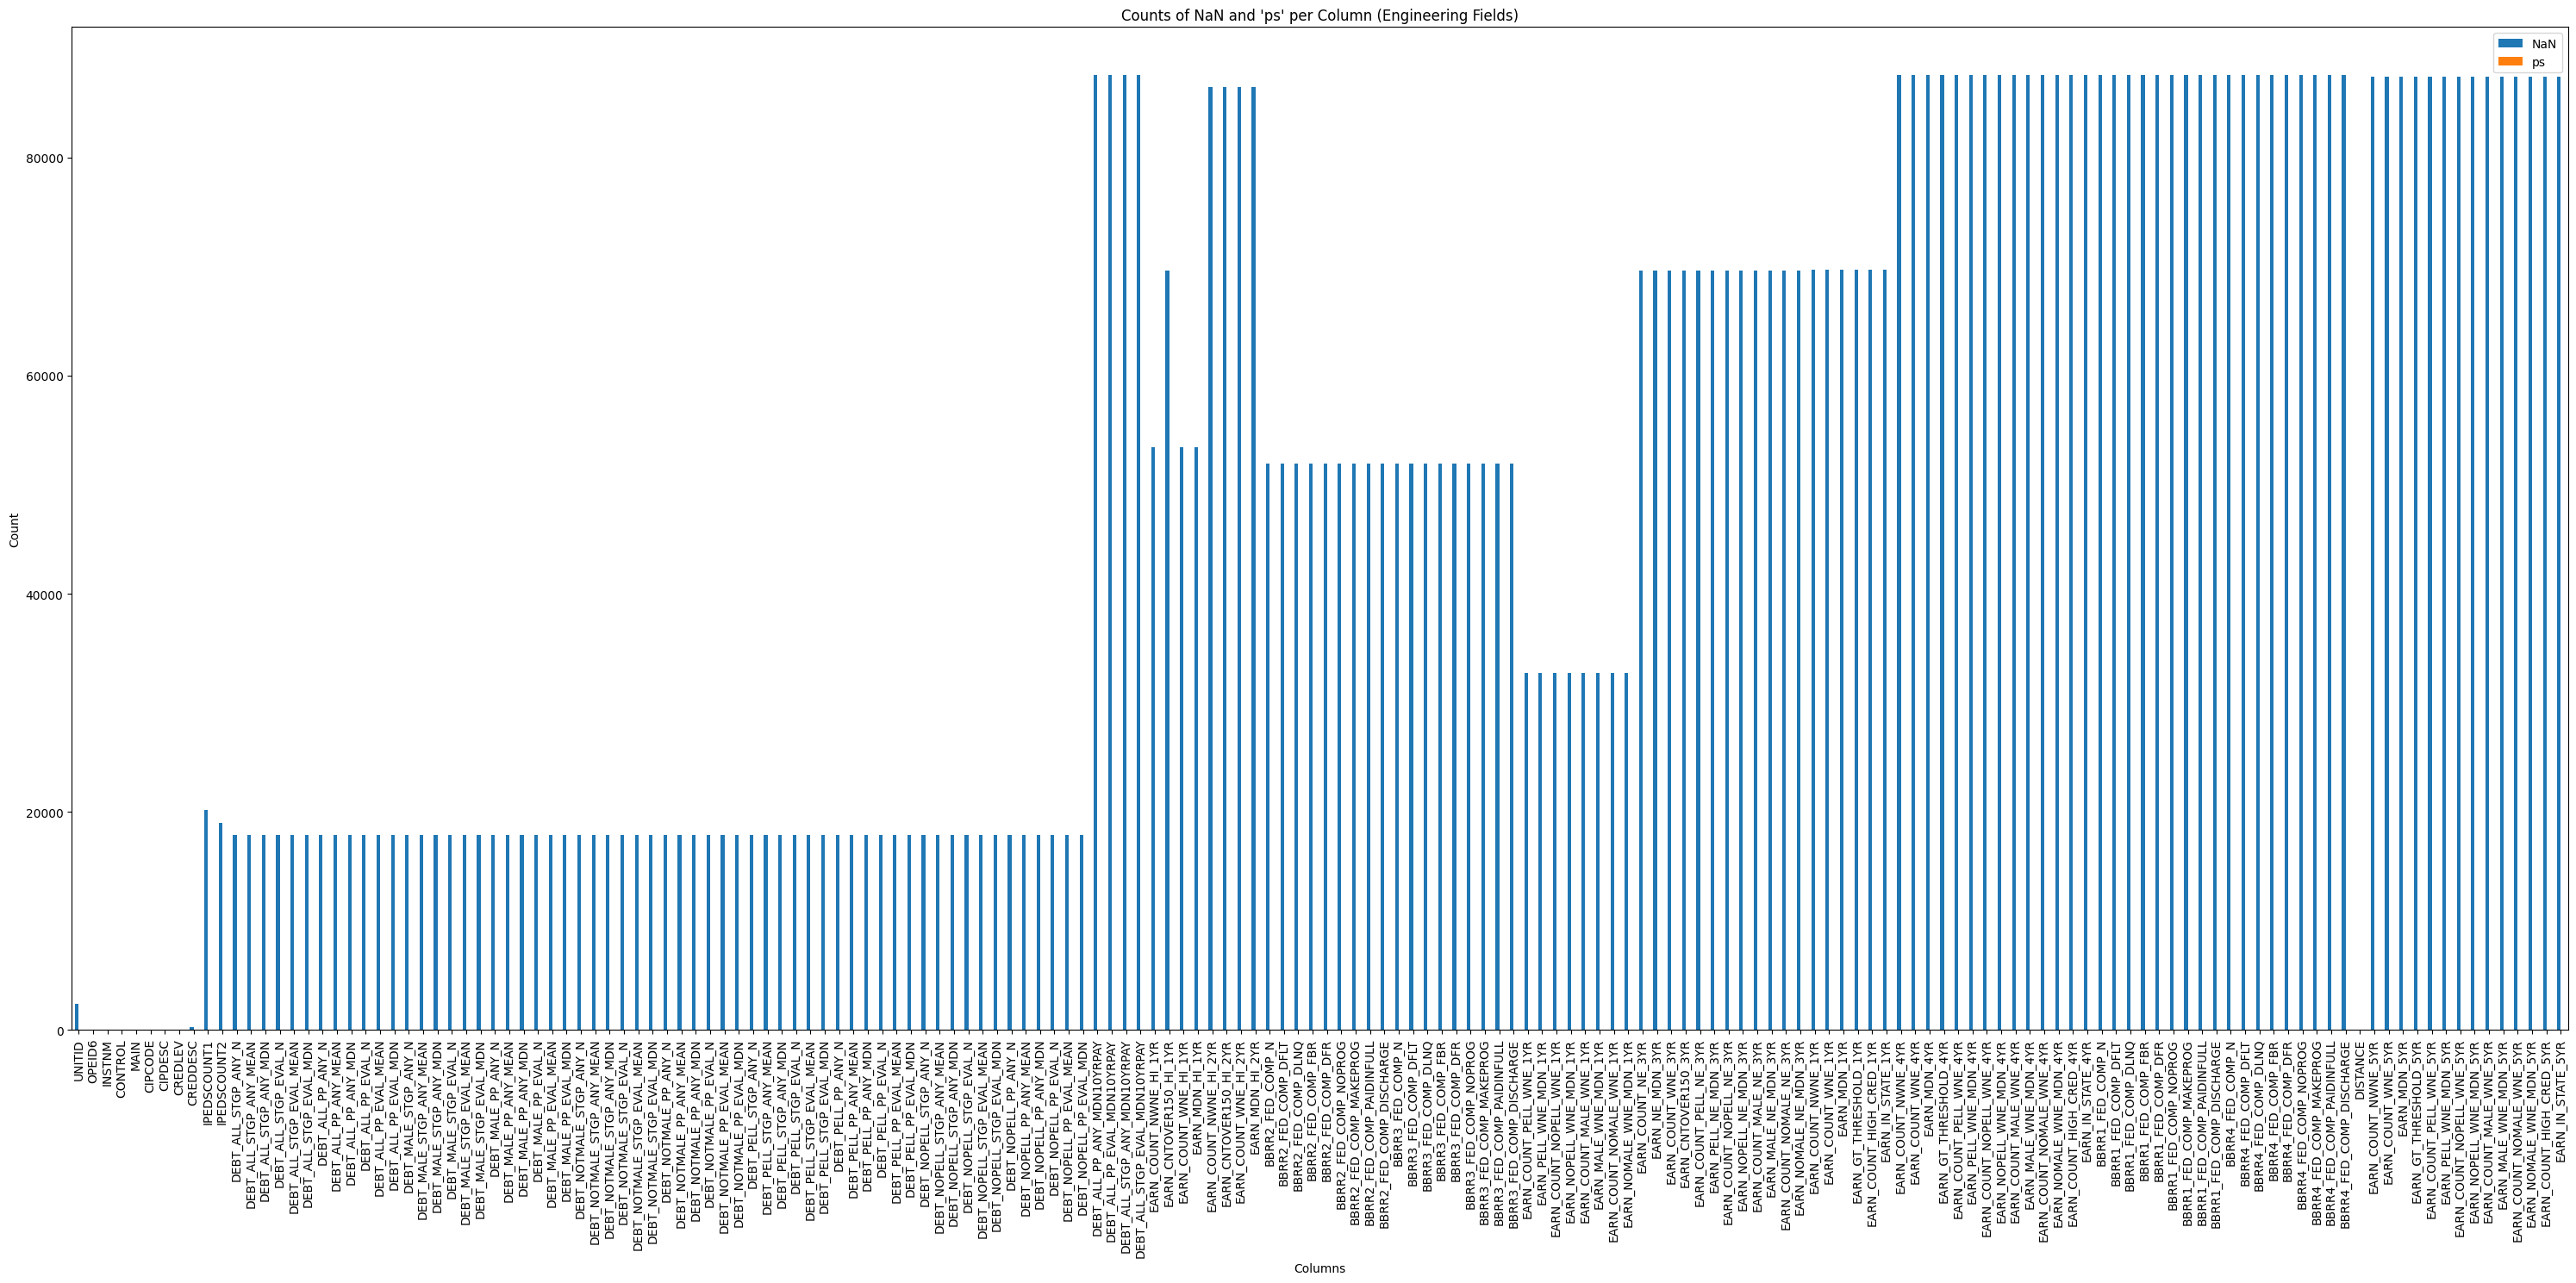

In [4]:
# Count cells containing the string "ps" (case-insensitive)
ps_counts = (engineering.applymap(
    lambda x: isinstance(x, str) and x.strip().lower() == "PS"
)).sum()

# Combine into one result
counts_df = pd.DataFrame({
    "NaN": nan_counts,
    "ps": ps_counts
})

print(counts_df)

# -------------------------
# 5. Plot NaN + ps counts
# -------------------------
counts_df.plot(kind="bar", figsize=(30,15))
plt.title("Counts of NaN and 'ps' per Column (Engineering Fields)")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [5]:
engineering

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_PELL_WNE_5YR,EARN_PELL_WNE_MDN_5YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR
26,100654.0,1002,Alabama A & M University,Public,1,1408,Civil Engineering.,3,Bachelor’s Degree,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelor’s Degree,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,100654.0,1002,Alabama A & M University,Public,1,1419,Mechanical Engineering.,3,Bachelor’s Degree,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,100654.0,1002,Alabama A & M University,Public,1,1499,"Engineering, Other.",5,Master's Degree,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,100654.0,1002,Alabama A & M University,Public,1,1503,Electrical Engineering Technologies/Technicians.,3,Bachelor’s Degree,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619778,NaN,41839,CETYS Universidad,Foreign,1,1513,Drafting/Design Engineering Technologies/Techn...,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1619842,NaN,42106,Advanced Computing Institute,"Private, for-profit",1,1512,Computer Engineering Technologies/Technicians.,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1619843,NaN,42106,Advanced Computing Institute,"Private, for-profit",1,1513,Drafting/Design Engineering Technologies/Techn...,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1619929,NaN,42571,Universiteit Maastricht,Foreign,1,1505,Environmental Control Technologies/Technicians.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


In [14]:
# -------------------------
# Set threshold
# -------------------------
threshold = 20000   # change this to whatever limit you want

# Compute total problematic counts
problem_counts = nan_counts + ps_counts

# Select only columns with counts BELOW threshold
cols_to_keep = problem_counts[problem_counts < threshold].index.tolist()

# Filter dataframe
engineering_filtered = engineering[cols_to_keep]

print("Remaining columns:", cols_to_keep)
print("New shape:", engineering_filtered.shape)


Remaining columns: ['UNITID', 'OPEID6', 'INSTNM', 'CONTROL', 'MAIN', 'CIPCODE', 'CIPDESC', 'CREDLEV', 'CREDDESC', 'IPEDSCOUNT2', 'DEBT_ALL_STGP_ANY_N', 'DEBT_ALL_STGP_ANY_MEAN', 'DEBT_ALL_STGP_ANY_MDN', 'DEBT_ALL_STGP_EVAL_N', 'DEBT_ALL_STGP_EVAL_MEAN', 'DEBT_ALL_STGP_EVAL_MDN', 'DEBT_ALL_PP_ANY_N', 'DEBT_ALL_PP_ANY_MEAN', 'DEBT_ALL_PP_ANY_MDN', 'DEBT_ALL_PP_EVAL_N', 'DEBT_ALL_PP_EVAL_MEAN', 'DEBT_ALL_PP_EVAL_MDN', 'DEBT_MALE_STGP_ANY_N', 'DEBT_MALE_STGP_ANY_MEAN', 'DEBT_MALE_STGP_ANY_MDN', 'DEBT_MALE_STGP_EVAL_N', 'DEBT_MALE_STGP_EVAL_MEAN', 'DEBT_MALE_STGP_EVAL_MDN', 'DEBT_MALE_PP_ANY_N', 'DEBT_MALE_PP_ANY_MEAN', 'DEBT_MALE_PP_ANY_MDN', 'DEBT_MALE_PP_EVAL_N', 'DEBT_MALE_PP_EVAL_MEAN', 'DEBT_MALE_PP_EVAL_MDN', 'DEBT_NOTMALE_STGP_ANY_N', 'DEBT_NOTMALE_STGP_ANY_MEAN', 'DEBT_NOTMALE_STGP_ANY_MDN', 'DEBT_NOTMALE_STGP_EVAL_N', 'DEBT_NOTMALE_STGP_EVAL_MEAN', 'DEBT_NOTMALE_STGP_EVAL_MDN', 'DEBT_NOTMALE_PP_ANY_N', 'DEBT_NOTMALE_PP_ANY_MEAN', 'DEBT_NOTMALE_PP_ANY_MDN', 'DEBT_NOTMALE_PP_EVAL_N'

In [15]:
 engineering_filtered

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT2,...,DEBT_NOPELL_STGP_EVAL_N,DEBT_NOPELL_STGP_EVAL_MEAN,DEBT_NOPELL_STGP_EVAL_MDN,DEBT_NOPELL_PP_ANY_N,DEBT_NOPELL_PP_ANY_MEAN,DEBT_NOPELL_PP_ANY_MDN,DEBT_NOPELL_PP_EVAL_N,DEBT_NOPELL_PP_EVAL_MEAN,DEBT_NOPELL_PP_EVAL_MDN,DISTANCE
26,100654.0,1002,Alabama A & M University,Public,1,1408,Civil Engineering.,3,Bachelor’s Degree,6.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelor’s Degree,19.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
28,100654.0,1002,Alabama A & M University,Public,1,1419,Mechanical Engineering.,3,Bachelor’s Degree,13.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
29,100654.0,1002,Alabama A & M University,Public,1,1499,"Engineering, Other.",5,Master's Degree,8.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
30,100654.0,1002,Alabama A & M University,Public,1,1503,Electrical Engineering Technologies/Technicians.,3,Bachelor’s Degree,5.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619778,NaN,41839,CETYS Universidad,Foreign,1,1513,Drafting/Design Engineering Technologies/Techn...,3,Bachelor's Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1619842,NaN,42106,Advanced Computing Institute,"Private, for-profit",1,1512,Computer Engineering Technologies/Technicians.,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
1619843,NaN,42106,Advanced Computing Institute,"Private, for-profit",1,1513,Drafting/Design Engineering Technologies/Techn...,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,0
1619929,NaN,42571,Universiteit Maastricht,Foreign,1,1505,Environmental Control Technologies/Technicians.,3,Bachelor's Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
